### Create an R script for converting `.fcs` files to `.csv` files

In [124]:
%%writefile fcsToCsv.R

library('flowCore')
listOfFiles <- list.files(path = '../rawdata', pattern = '*.fcs', full.names = TRUE)

convertToCsv <- function(infile) {
    data <- read.FCS(infile, transformation = FALSE)
    outfile <- gsub("rawdata","processeddata",infile)
    outfile <- gsub(".fcs",".csv",outfile)
    write.csv(exprs(data), outfile)
}

temp <- lapply(listOfFiles, convertToCsv)

Overwriting fcsToCsv.R


### Run above R Script 

In [125]:
!Rscript fcsToCsv.R

### Define global imports and variables

In [126]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display
import sys
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.color_cycle'] = ['black','blue','green','red','cyan','magenta','yellow']
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.sans-serif'] = 'Droid Sans'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

samplechannel = {
    'FITC-A': 'yfp',
    'PE-Texas Red-A': 'mkate2',
    'Pacific Blue-A': 'cfp',
}

In [127]:
ls ../rawdata/

sampleannotations.csv@         Specimen_003_B2_B02_041.fcs@
Specimen_001_A10_A10_004.fcs@  Specimen_003_B3_B03_042.fcs@
Specimen_001_A11_A11_005.fcs@  Specimen_003_B4_B04_043.fcs@
Specimen_001_A12_A12_006.fcs@  Specimen_003_B5_B05_044.fcs@
Specimen_001_A7_A07_001.fcs@   Specimen_003_C1_C01_046.fcs@
Specimen_001_A8_A08_002.fcs@   Specimen_003_C2_C02_047.fcs@
Specimen_001_A9_A09_003.fcs@   Specimen_003_C3_C03_048.fcs@
Specimen_001_B10_B10_010.fcs@  Specimen_003_C4_C04_049.fcs@
Specimen_001_B11_B11_011.fcs@  Specimen_003_C5_C05_050.fcs@
Specimen_001_B12_B12_012.fcs@  Specimen_003_D1_D01_052.fcs@
Specimen_001_B7_B07_007.fcs@   Specimen_003_D2_D02_053.fcs@
Specimen_001_B8_B08_008.fcs@   Specimen_003_D3_D03_054.fcs@
Specimen_001_B9_B09_009.fcs@   Specimen_003_D4_D04_055.fcs@
Specimen_001_C10_C10_016.fcs@  Specimen_003_D5_D05_056.fcs@
Specimen_001_C11_C11_017.fcs@  Specimen_003_E1_E01_058.fcs@
Specimen_001_C12_C12_018.fcs@  Specimen_003_E2_E02_059.fcs@
Specimen_001_C7_C07_013.fcs@   Specimen_

### Read in sample annotations

In [128]:
sampleannotations = pd.read_table('../rawdata/sampleannotations.csv', 
                                  index_col = 0,
                                  sep = ','
                                 )
sampleannotations.sort_values(by=['samplename'])

,samplename
filename,
Specimen_003_H1_H01_076.fcs,by4741
Specimen_003_H5_H05_080.fcs,by4741_6xaga_yfp_1
Specimen_003_H6_H06_081.fcs,by4741_6xaga_yfp_2
Specimen_003_H3_H03_078.fcs,by4741_6xcgg_yfp_1
Specimen_003_H4_H04_079.fcs,by4741_6xcgg_yfp_2
Specimen_003_G1_G01_070.fcs,by4741_dhh1knockout
Specimen_003_G4_G04_073.fcs,by4741_dhh1knockout_mkate2
Specimen_003_A4_A04_037.fcs,by4741_dhh1knockout_mkate2_6xaga_yfp_1
Specimen_003_B4_B04_043.fcs,by4741_dhh1knockout_mkate2_6xaga_yfp_2


### Calculate summary statistics for all samples and channels

In [129]:
data = dict()
files = !ls ../processeddata/*.csv

# read each file into a separate dataframe
for File in files:
    filename = File.split('/')[-1].replace('.csv','.fcs')
    data[sampleannotations.ix[filename]['samplename']] = pd.read_table(File, 
                                                                 sep=',').drop('Unnamed: 0', axis = 1)
# concatenate all dataframes
data = pd.concat(data, axis=1)
data.columns.names = ['sample','channel']
# calculate summary statistics
statistics = {
    'mean' : np.mean,
    'median' : np.median,
    'std' : np.std,
}

summary = dict()

for col in data:
    if col[1] not in summary:
        summary[col[1]] =  dict()
    for statistic,func in statistics.items():
        if statistic not in summary[col[1]]:
            summary[col[1]][statistic] = dict()
        if col[1] in ['FITC-A']:
            subset = np.log10(data[col]) > 0
        elif col[1] in ['PE-Texas Red-A']:
            subset = np.log10(data[col]) > 0
        else:
            subset = data.index
        summary[col[1]][statistic][col[0]] = func(data[col].ix[subset])
for channel in summary:
    summary[channel] = pd.DataFrame.from_dict(summary[channel])
    summary[channel]['normsd'] = summary[channel]['std'] / summary[channel]['mean'] 
summarydf = pd.concat(summary, axis = 1)

In [130]:
files

['../processeddata/Specimen_001_A10_A10_004.csv',
 '../processeddata/Specimen_001_A11_A11_005.csv',
 '../processeddata/Specimen_001_A12_A12_006.csv',
 '../processeddata/Specimen_001_A7_A07_001.csv',
 '../processeddata/Specimen_001_A8_A08_002.csv',
 '../processeddata/Specimen_001_A9_A09_003.csv',
 '../processeddata/Specimen_001_B10_B10_010.csv',
 '../processeddata/Specimen_001_B11_B11_011.csv',
 '../processeddata/Specimen_001_B12_B12_012.csv',
 '../processeddata/Specimen_001_B7_B07_007.csv',
 '../processeddata/Specimen_001_B8_B08_008.csv',
 '../processeddata/Specimen_001_B9_B09_009.csv',
 '../processeddata/Specimen_001_C10_C10_016.csv',
 '../processeddata/Specimen_001_C11_C11_017.csv',
 '../processeddata/Specimen_001_C12_C12_018.csv',
 '../processeddata/Specimen_001_C7_C07_013.csv',
 '../processeddata/Specimen_001_C8_C08_014.csv',
 '../processeddata/Specimen_001_C9_C09_015.csv',
 '../processeddata/Specimen_001_D10_D10_022.csv',
 '../processeddata/Specimen_001_D11_D11_023.csv',
 '../proc

### Show summary statistics for fluorescence channels

In [131]:
summarydf.loc[:,(['FITC-A','PE-Texas Red-A'],)]

FITC-A                \
                                                   mean        median   
by4741                                        76.113147     66.471672   
by4741_6xaga_yfp_1                         19819.516942  16896.028320   
by4741_6xaga_yfp_2                         20814.549822  17307.824219   
by4741_6xcgg_yfp_1                          2204.408030   1921.734863   
by4741_6xcgg_yfp_2                          2311.956828   1982.854492   
by4741_dhh1knockout                           94.661590     77.105560   
by4741_dhh1knockout_mkate2                   484.328564    385.534760   
by4741_dhh1knockout_mkate2_6xaga_yfp_1     16579.950446  13468.640625   
by4741_dhh1knockout_mkate2_6xaga_yfp_2     17583.442237  14229.424805   
by4741_dhh1knockout_mkate2_6xcgg_yfp_1      4839.979510   3850.094727   
by4741_dhh1knockout_mkate2_6xcgg_yfp_2      4656.504892   3889.325439   
by4741_dhh1knockout_mkate2_aaaataaa_yfp_1   2619.289582   2054.529053   
by4741_dhh1knockout_mkate2_aaaataaa_yfp_2   2913.367517   2226.294678   
by4741_dhh1knockout_mkate2_aaaataaa_yfp_3   2339.866765   1977.398560   
by4741_dhh1knockout_mkate2_maxhis3_yfp_1   23833.900520  16909.408203   
by4741_dhh1knockout_mkate2_maxhis3_yfp_2   21042.536355  16701.626953   
by4741_dhh1knockout_mkate2_minhis3_yfp_1    3333.652973   2732.010864   
by4741_dhh1knockout_mkate2_minhis3_yfp_2    3396.293452   2583.920410   
by4741_ltn1knockout                           71.395443     63.848167   
by4741_ltn1knockout_mkate2                   297.479304    261.503754   
by4741_ltn1knockout_mkate2_6xaga_yfp_1     22960.950146  19642.523438   
by4741_ltn1knockout_mkate2_6xaga_yfp_2     24183.601299  21052.466797   
by4741_ltn1knockout_mkate2_6xcgg_yfp_1      2580.804948   2244.351318   
by4741_ltn1knockout_mkate2_6xcgg_yfp_2      2688.390058   2310.439941   
by4741_ltn1knockout_mkate2_aaaataaa_yfp_1   3195.149547   2586.908203   
by4741_ltn1knockout_mkate2_aaaataaa_yfp_2   3374.060143   2854.120605   
by4741_ltn1knockout_mkate2_maxhis3_yfp_1   25030.754775  21690.689453   
by4741_ltn1knockout_mkate2_maxhis3_yfp_2   26101.885570  22246.645508   
by4741_ltn1knockout_mkate2_minhis3_yfp_1    3838.854198   2806.380859   
by4741_ltn1knockout_mkate2_minhis3_yfp_2    3785.425037   2895.884766   
...                                                 ...           ...   
by4741_mkate2_aaaacaaa_yfp_1                3442.996614   2863.668457   
by4741_mkate2_aaaacaaa_yfp_2               23762.330623  20264.763672   
by4741_mkate2_aaaataaa_yfp_1                3294.287381   2829.179199   
by4741_mkate2_aaaataaa_yfp_2                3525.595763   2894.650635   
by4741_mkate2_ata_yfp_1                     2046.063847   1150.234985   
by4741_mkate2_ata_yfp_2                     1141.051782    972.753601   
by4741_mkate2_ctg_yfp_1                     2449.984353   2028.580750   
by4741_mkate2_ctg_yfp_2                     2146.383955   1782.282715   
by4741_mkate2_gtg_yfp_1                     1919.702125   1658.614258   
by4741_mkate2_gtg_yfp_2                     1897.605430   1640.265320   
by4741_mkate2_maxhis3_yfp_1                21387.414441  18179.349609   
by4741_mkate2_maxhis3_yfp_2                22535.344426  19182.240234   
by4741_mkate2_minhis3_yfp_1                 3595.261774   2452.230103   
by4741_mkate2_minhis3_yfp_2                 3029.858655   2449.761963   
by4741_mkate2_ttg_yfp_1                     1804.429427   1560.179504   
by4741_mkate2_ttg_yfp_2                     1915.469886   1632.990662   
by4741_nam7knockout                           76.349171     69.198765   
by4741_rqc2knockout                           72.162329     64.262413   
by4741_rqc2knockout_mkate2                   281.428918    247.849884   
by4741_rqc2knockout_mkate2_6xaga_yfp_1     23598.704654  20186.626953   
by4741_rqc2knockout_mkate2_6xaga_yfp_2     25477.780061  21704.732422   
by4741_rqc2knockout_mkate2_6xcgg_yfp_1      1954.861909   1658.873901   
by4741_rqc2knockout_mkate2_6xcgg_y

### Scatter Plot of YFP vs mKate2 for all samples

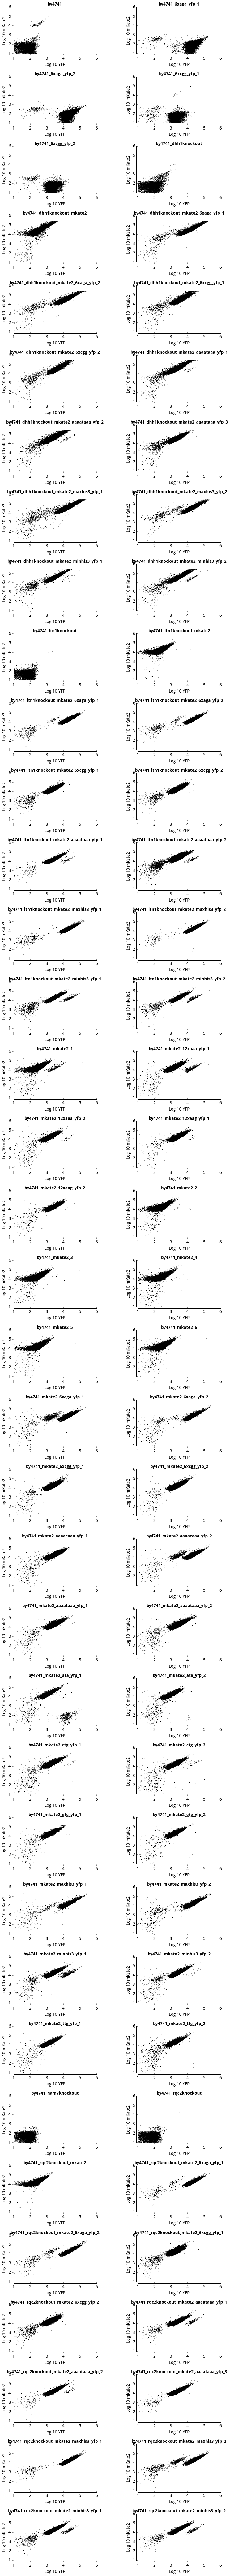

In [132]:
fig = plt.figure()
axcount = 0
samples = data.columns.levels[0]
for sample in sorted(samples):
    axcount += 1
    ax = fig.add_subplot(np.ceil(len(samples)/2.0), 2, axcount)
    x = data[(sample, 'FITC-A')].apply(np.log10)
    y = data[(sample, 'PE-Texas Red-A')].apply(np.log10)
    plt.scatter(x,y, s=1)
    ax.xaxis.set( ticks_position = 'bottom' )
    ax.set_ylim(bottom = 0,)
    ax.yaxis.set( ticks_position = 'left' )  
    spineOffset = {'left': 5, 'bottom': 5}    
    [ spine.set_position(('outward',spineOffset[loc])) 
     if loc in ['left','bottom'] else spine.set_color('none') 
     for loc, spine in ax.spines.items() ]  
    ax.set(xlim = (1,6), ylim = (1,6),
           xlabel = 'Log 10 YFP', ylabel = 'Log 10 mKate2',
           title = sample
          )
fig.set_size_inches(12, np.ceil(len(samples)/2.0)*4)    

### Histogram of YFP and mKate2 for each Sample

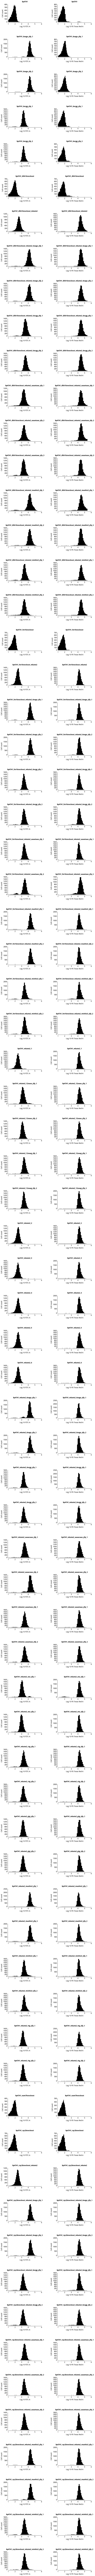

In [134]:
subsetsamples = samples
fig = plt.figure()
fig.subplots_adjust(hspace = 1.0)
axcount = 0
for sample in subsetsamples:
    for channel in ['FITC-A', 'PE-Texas Red-A']:
        axcount += 1
        ax = fig.add_subplot(len(subsetsamples), 2, axcount)
        y = data[(sample, channel)].apply(np.log10)
        #threshold = np.log10(thresholds[channel])
        y = y[(y > 0) & (y.apply(lambda x: not np.isnan(x)))] 
        ax.hist(np.array(y),50)   
        ax.xaxis.set( ticks_position = 'bottom' )
        ax.set_ylim(bottom = 0,)
        ax.yaxis.set( ticks_position = 'left' )  
        spineOffset = {'left': 5, 'bottom': 5}    
        [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]  
        ax.set(xlim = (1,6),
               xlabel = 'Log 10 ' + channel, ylabel = 'Cell count',
              )
        temp = sample
        title = ax.set_title(temp)
        title.set_position([0.5,1.1])
fig.set_size_inches(12, len(subsetsamples)*5)        

### Bar plots of normalized median YFP expression

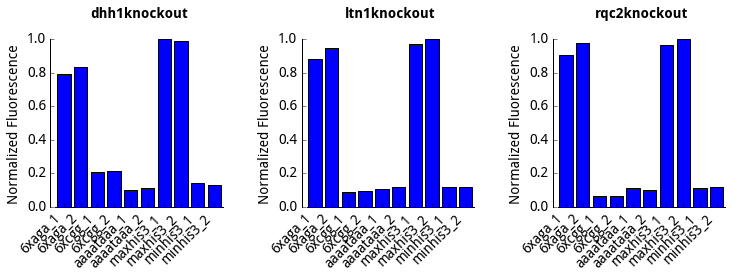

In [135]:
fig = plt.figure()

samplesets = [
        ['by4741_dhh1knockout_mkate2_6xaga_yfp_1',
         'by4741_dhh1knockout_mkate2_6xaga_yfp_2',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_1',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_2',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_minhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_minhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_2',        
        ], 
        ['by4741_ltn1knockout_mkate2_6xaga_yfp_1',
         'by4741_ltn1knockout_mkate2_6xaga_yfp_2',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_1',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_2',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_minhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_minhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_2',        
        ],   
        ['by4741_rqc2knockout_mkate2_6xaga_yfp_1',
         'by4741_rqc2knockout_mkate2_6xaga_yfp_2',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_1',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_2',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_minhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_minhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_1',
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_2',        
        ],       
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('FITC-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:3])
    bkgd = summarydf.ix[bkgd_sample][('FITC-A','median')] 
    ydata = ydata - bkgd
    ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,3,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5),
           ylabel = 'Normalized Fluorescence'
          )
    #for (x,y) in zip(xdata,ydata):
    #    ax.text(x,y+0.05,'%d'%(y*100), ha = 'center')
    ticklabels = [sample.split('_')[3] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[1], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 

### Bar plots of raw median YFP expression

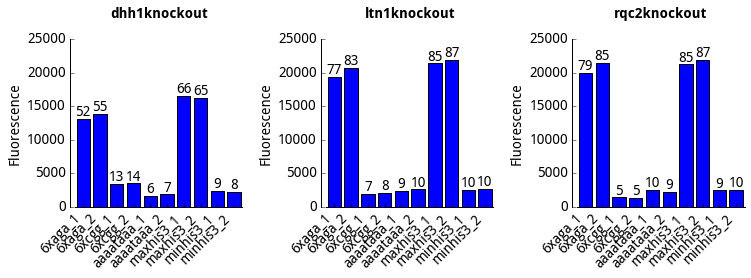

In [136]:
fig = plt.figure()

samplesets = [
        ['by4741_dhh1knockout_mkate2_6xaga_yfp_1',
         'by4741_dhh1knockout_mkate2_6xaga_yfp_2',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_1',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_2',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_minhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_minhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_2',        
        ], 
        ['by4741_ltn1knockout_mkate2_6xaga_yfp_1',
         'by4741_ltn1knockout_mkate2_6xaga_yfp_2',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_1',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_2',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_minhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_minhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_2',        
        ],   
        ['by4741_rqc2knockout_mkate2_6xaga_yfp_1',
         'by4741_rqc2knockout_mkate2_6xaga_yfp_2',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_1',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_2',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_minhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_minhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_1',
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_2',        
        ],       
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('FITC-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:3])
    bkgd = summarydf.ix[bkgd_sample][('FITC-A','median')] 
    ydata = ydata - bkgd
    #ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,3,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5), ylim = (0,25000),
           ylabel = 'Fluorescence'
          )
    for (x,y) in zip(xdata,ydata):
        ax.text(x,y+500,'%d'%(y/25000*100), ha = 'center')
    ticklabels = [sample.split('_')[3] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[1], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 

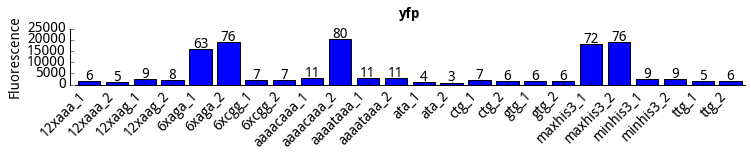

In [166]:
fig = plt.figure()

samplesets = [
        ['by4741_mkate2_minhis3_yfp_1',
         'by4741_mkate2_minhis3_yfp_2',
         'by4741_mkate2_maxhis3_yfp_1',
         'by4741_mkate2_maxhis3_yfp_2',     
         'by4741_mkate2_6xcgg_yfp_1',
         'by4741_mkate2_6xcgg_yfp_2',         
         'by4741_mkate2_6xaga_yfp_1',
         'by4741_mkate2_6xaga_yfp_2',
         'by4741_mkate2_aaaataaa_yfp_1',
         'by4741_mkate2_aaaataaa_yfp_2',   
         'by4741_mkate2_aaaacaaa_yfp_1',
         'by4741_mkate2_aaaacaaa_yfp_2',   
         'by4741_mkate2_12xaaa_yfp_1',
         'by4741_mkate2_12xaaa_yfp_2',   
         'by4741_mkate2_12xaag_yfp_1',
         'by4741_mkate2_12xaag_yfp_2', 
         'by4741_mkate2_ata_yfp_1',
         'by4741_mkate2_ata_yfp_2',   
         'by4741_mkate2_ctg_yfp_1',
         'by4741_mkate2_ctg_yfp_2', 
         'by4741_mkate2_gtg_yfp_1',
         'by4741_mkate2_gtg_yfp_2',   
         'by4741_mkate2_ttg_yfp_1',
         'by4741_mkate2_ttg_yfp_2', 
        ], 
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('FITC-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:1])
    bkgd = summarydf.ix[bkgd_sample][('FITC-A','median')] 
    ydata = ydata - bkgd
    #ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,1,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5), ylim = (0,25000),
           ylabel = 'Fluorescence'
          )
    for (x,y) in zip(xdata,ydata):
        ax.text(x,y+500,'%d'%(y/25000*100), ha = 'center')
    ticklabels = [sample.split('_')[2] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[3], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 

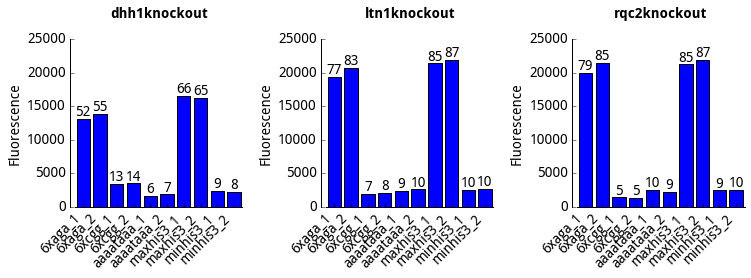

In [175]:
fig = plt.figure()

samplesets = [
        ['by4741_dhh1knockout_mkate2_6xaga_yfp_1',
         'by4741_dhh1knockout_mkate2_6xaga_yfp_2',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_1',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_2',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_minhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_minhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_2',        
        ], 
        ['by4741_ltn1knockout_mkate2_6xaga_yfp_1',
         'by4741_ltn1knockout_mkate2_6xaga_yfp_2',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_1',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_2',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_minhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_minhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_2', 
        ],   
        ['by4741_rqc2knockout_mkate2_6xaga_yfp_1',
         'by4741_rqc2knockout_mkate2_6xaga_yfp_2',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_1',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_2',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_minhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_minhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_1',
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_2',       
        ],       
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('FITC-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:3])
    bkgd = summarydf.ix[bkgd_sample][('FITC-A','median')] 
    ydata = ydata - bkgd
    #ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,3,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5), ylim = (0,25000),
           ylabel = 'Fluorescence'
          )
    for (x,y) in zip(xdata,ydata):
        ax.text(x,y+500,'%d'%(y/25000*100), ha = 'center')
    ticklabels = [sample.split('_')[3] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[1], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 

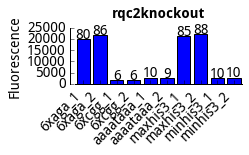

In [174]:
fig = plt.figure()

samplesets = [
        ['by4741_rqc2knockout_mkate2_6xaga_yfp_1',
         'by4741_rqc2knockout_mkate2_6xaga_yfp_2',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_1',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_2',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_minhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_minhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_1',
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_2',   
        ], 
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('FITC-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:1])
    bkgd = summarydf.ix[bkgd_sample][('FITC-A','median')] 
    ydata = ydata - bkgd
    #ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,3,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5), ylim = (0,25000),
           ylabel = 'Fluorescence'
          )
    for (x,y) in zip(xdata,ydata):
        ax.text(x,y+500,'%d'%(y/25000*100), ha = 'center')
    ticklabels = [sample.split('_')[3] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[1], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 

### Bar plots of raw median mKate2 expression

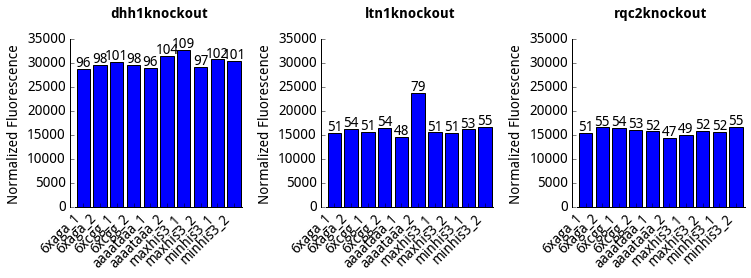

In [137]:
fig = plt.figure()

samplesets = [
        ['by4741_dhh1knockout_mkate2_6xaga_yfp_1',
         'by4741_dhh1knockout_mkate2_6xaga_yfp_2',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_1',
         'by4741_dhh1knockout_mkate2_6xcgg_yfp_2',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_minhis3_yfp_1',
         'by4741_dhh1knockout_mkate2_minhis3_yfp_2',         
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_dhh1knockout_mkate2_aaaataaa_yfp_2',        
        ], 
        ['by4741_ltn1knockout_mkate2_6xaga_yfp_1',
         'by4741_ltn1knockout_mkate2_6xaga_yfp_2',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_1',
         'by4741_ltn1knockout_mkate2_6xcgg_yfp_2',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_maxhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_minhis3_yfp_1',
         'by4741_ltn1knockout_mkate2_minhis3_yfp_2',         
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_1',
         'by4741_ltn1knockout_mkate2_aaaataaa_yfp_2',        
        ],   
        ['by4741_rqc2knockout_mkate2_6xaga_yfp_1',
         'by4741_rqc2knockout_mkate2_6xaga_yfp_2',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_1',
         'by4741_rqc2knockout_mkate2_6xcgg_yfp_2',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_maxhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_minhis3_yfp_1',
         'by4741_rqc2knockout_mkate2_minhis3_yfp_2',         
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_1',
         'by4741_rqc2knockout_mkate2_aaaataaa_yfp_2',        
        ],       
        ]

axcount = 0
for samples in samplesets:
    axcount += 1
    ydata = summarydf.ix[sorted(samples)][('PE-Texas Red-A','median')] 
    bkgd_sample = '_'.join(samples[0].split('_')[:2])
    bkgd = summarydf.ix[bkgd_sample][('PE-Texas Red-A','median')] 
    ydata = ydata - bkgd
    #ydata = ydata / ydata.max()
    xdata = range(len(ydata))
    ax = fig.add_subplot(1,3,axcount)
    ax.bar(xdata, ydata, align = 'center')
    # customize axis display
    spineOffset = {'left': 5, 'bottom': 0} # move left axis outward by 5pt
    # remove top and right axes
    [ spine.set_position(('outward',spineOffset[loc])) 
        if loc in ['left','bottom']
        else spine.set_color('none') for loc, spine in ax.spines.items() ]    
    ax.xaxis.set( ticks_position = 'bottom', 
                 ticks = range(len(xdata)),
                )
    ax.set(xlim=(-0.5, len(xdata) - 0.5), ylim = (0,35000),
           ylabel = 'Normalized Fluorescence'
          )
    for (x,y) in zip(xdata,ydata):
        ax.text(x,y+500,'%d'%(y/30000*100), ha = 'center')
    ticklabels = [sample.split('_')[3] + '_' + sample.split('_')[-1] for sample in sorted(samples)]
    ax.set_xticklabels(ticklabels, rotation = 45, ha = 'right')
    ax.yaxis.set( ticks_position = 'left')
    ax.set_title(samples[0].split('_')[1], position=(0.5,1.1))
    
fig.set_size_inches(12, len(samplesets)) 